# Lesson 6 - Session 4 - Example 2

## Feature engineering

1. Handling categorical features
2. Transform numerical values
3. Scaling
4. Binning
5. Feature Selection 

## Handling categorical values (1/5)

In [1]:
import pandas as pd

In [2]:
# Load data, check non-numeric columns 
df = pd.read_csv('../data/dogs.csv')
df.head()

,breed,type,longevity,size,weight
0,German Shepherd,herding,9.73,large,NaN
1,Beagle,hound,12.30,small,NaN
2,Yorkshire Terrier,toy,12.60,small,5.5
3,Golden Retriever,sporting,12.04,medium,60.0
4,Bulldog,non-sporting,6.29,medium,45.0


In [3]:
# detect non-numeric columns of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   breed      23 non-null     object 
 1   type       23 non-null     object 
 2   longevity  23 non-null     float64
 3   size       23 non-null     object 
 4   weight     15 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.0+ KB


In [4]:
# select column types based on type
df.select_dtypes(include=['object'])

,breed,type,size
0,German Shepherd,herding,large
1,Beagle,hound,small
2,Yorkshire Terrier,toy,small
3,Golden Retriever,sporting,medium
4,Bulldog,non-sporting,medium
5,Labrador Retriever,sporting,medium
6,Boxer,working,medium
7,Poodle,non-sporting,medium
8,Dachshund,hound,small
9,Rottweiler,working,large


In [5]:
# automated encoding for nominal values in column "type" 
# using sklearn.preprocessing.LabelEncoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'].astype(str))
df

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,breed,type,longevity,size,weight
0,German Shepherd,0,9.73,large,NaN
1,Beagle,1,12.30,small,NaN
2,Yorkshire Terrier,5,12.60,small,5.5
3,Golden Retriever,3,12.04,medium,60.0
4,Bulldog,2,6.29,medium,45.0
5,Labrador Retriever,3,12.04,medium,67.5
6,Boxer,6,8.81,medium,NaN
7,Poodle,2,11.95,medium,NaN
8,Dachshund,1,12.63,small,24.0
9,Rottweiler,6,9.11,large,NaN


In [6]:
# automated encoding for ordinal values in column "size"
df = pd.read_csv('../data/dogs.csv')
sizes = pd.Categorical(df['size'], categories=['small', 'medium', 'large'], ordered=True)
print(sizes)
labels, _ = pd.factorize(sizes, sort=True)
df['size'] = labels
df

['large', 'small', 'small', 'medium', 'medium', ..., 'large', 'small', 'small', 'large', 'small']
Length: 23
Categories (3, object): ['small' < 'medium' < 'large']


,breed,type,longevity,size,weight
0,German Shepherd,herding,9.73,2,NaN
1,Beagle,hound,12.30,0,NaN
2,Yorkshire Terrier,toy,12.60,0,5.5
3,Golden Retriever,sporting,12.04,1,60.0
4,Bulldog,non-sporting,6.29,1,45.0
5,Labrador Retriever,sporting,12.04,1,67.5
6,Boxer,working,8.81,1,NaN
7,Poodle,non-sporting,11.95,1,NaN
8,Dachshund,hound,12.63,0,24.0
9,Rottweiler,working,9.11,2,NaN


In [7]:
# one hot encoding for column "type"
df = pd.read_csv('../data/dogs.csv')
type_dummies = pd.get_dummies(df['type'])
df =  pd.concat([df, type_dummies], axis=1)
df.drop(columns=['type'], inplace=True)
df

,breed,longevity,size,weight,herding,hound,non-sporting,sporting,terrier,toy,working
0,German Shepherd,9.73,large,NaN,1,0,0,0,0,0,0
1,Beagle,12.30,small,NaN,0,1,0,0,0,0,0
2,Yorkshire Terrier,12.60,small,5.5,0,0,0,0,0,1,0
3,Golden Retriever,12.04,medium,60.0,0,0,0,1,0,0,0
4,Bulldog,6.29,medium,45.0,0,0,1,0,0,0,0
5,Labrador Retriever,12.04,medium,67.5,0,0,0,1,0,0,0
6,Boxer,8.81,medium,NaN,0,0,0,0,0,0,1
7,Poodle,11.95,medium,NaN,0,0,1,0,0,0,0
8,Dachshund,12.63,small,24.0,0,1,0,0,0,0,0
9,Rottweiler,9.11,large,NaN,0,0,0,0,0,0,1


## Transform numerical values (2/5)

Log transformation

In [8]:
# read births data
df = pd.read_csv('../data/births2021.csv')
df

,Rank,Country,Number of births (2021)
0,1,India,23113533
1,2,China,10881567
2,3,Nigeria,7923294
3,4,Pakistan,6374741
4,5,Indonesia,4496383
...,...,...,...
231,232,Falkland Islands,42
232,233,"Saint Helena, Ascension and Tristan da Cunha",41
233,234,Montserrat,40
234,235,Tokelau,35


Skew: 8.673064836633124


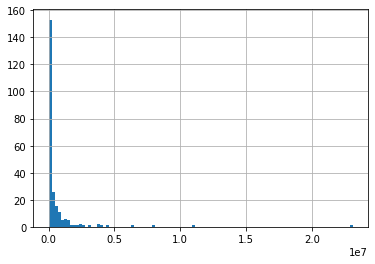

In [9]:
# plot a histogram for values in column Number of births (2021)
print('Skew:', df.iloc[:,2].skew())
df.iloc[:,2].hist(bins=100);

0      16.955929
1      16.202581
2      15.885318
3      15.667854
4      15.318784
         ...    
231     3.737670
232     3.713572
233     3.688879
234     3.555348
235     3.295837
Name: Number of births (2021), Length: 236, dtype: float64
Skew: -0.542264686527569


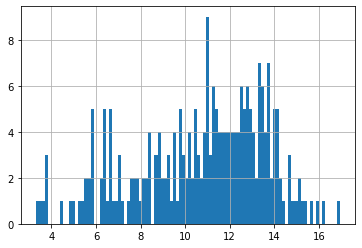

In [10]:
# Logarithm transformation of birth values
import math
log_births = df.iloc[:,2].transform(lambda x: math.log(x))
print(log_births)
print('Skew:', log_births.skew())
log_births.hist(bins=100);

## Scaling (3/5)

In [11]:
# Load data, drop columns "type" and "size"
df = pd.read_csv('../data/dogs.csv')
df.set_index('breed', inplace=True)
df.drop(columns=['size', 'type'], inplace = True)
df.head()

,longevity,weight
breed,,
German Shepherd,9.73,NaN
Beagle,12.30,NaN
Yorkshire Terrier,12.60,5.5
Golden Retriever,12.04,60.0
Bulldog,6.29,45.0


In [12]:
# Normalization (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
transformed_values = ss.fit_transform(df)
df2 = pd.DataFrame(transformed_values, columns=df.columns)
df2.head()

,longevity,weight
0,0.336925,NaN
1,0.588639,NaN
2,0.618022,0.008
3,0.563173,0.880
4,0.000000,0.640


In [13]:
# Standardization (zero-mean scaling)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
transformed_values = ss.fit_transform(df)
df2 = pd.DataFrame(transformed_values, columns=df.columns)
df2.head()

,longevity,weight
0,-0.650093,NaN
1,0.542922,NaN
2,0.682184,-1.032733
3,0.422228,1.468776
4,-2.246969,0.780287


## Binning (4/5)

In [14]:
# load data
df = pd.read_csv('../data/dogs.csv')
df.head()

,breed,type,longevity,size,weight
0,German Shepherd,herding,9.73,large,NaN
1,Beagle,hound,12.30,small,NaN
2,Yorkshire Terrier,toy,12.60,small,5.5
3,Golden Retriever,sporting,12.04,medium,60.0
4,Bulldog,non-sporting,6.29,medium,45.0


In [15]:
# Manual binning 
df = pd.read_csv('../data/dogs.csv')
longevity_bin = [0,7,12,18]
longevity_label = ['<7', '<12', '>12']
cuts = pd.cut(df['longevity'], bins=longevity_bin, labels=longevity_label)
print(cuts)
df['longevity'] = cuts
df.head()

0     <12
1     >12
2     >12
3     >12
4      <7
5     >12
6     <12
7     <12
8     >12
9     <12
10    <12
11    >12
12    <12
13    <12
14    >12
15    >12
16    <12
17    <12
18     <7
19    >12
20    <12
21    <12
22    >12
Name: longevity, dtype: category
Categories (3, object): ['<7' < '<12' < '>12']


,breed,type,longevity,size,weight
0,German Shepherd,herding,<12,large,NaN
1,Beagle,hound,>12,small,NaN
2,Yorkshire Terrier,toy,>12,small,5.5
3,Golden Retriever,sporting,>12,medium,60.0
4,Bulldog,non-sporting,<7,medium,45.0


In [16]:
# Uniform Binning
df = pd.read_csv('../data/dogs.csv')
longevity_label = [0,1,2,3,4]
df['longevity'] =  pd.cut(df['longevity'], bins=5, labels=longevity_label)
print(df['longevity'].value_counts())
df.head()

2    9
1    6
3    5
0    2
4    1
Name: longevity, dtype: int64


,breed,type,longevity,size,weight
0,German Shepherd,herding,1,large,NaN
1,Beagle,hound,2,small,NaN
2,Yorkshire Terrier,toy,3,small,5.5
3,Golden Retriever,sporting,2,medium,60.0
4,Bulldog,non-sporting,0,medium,45.0


In [17]:
# Quantile Binning
df = pd.read_csv('../data/dogs.csv')
longevity_label = [0,1,2,3,4]
df['longevity'] =  pd.qcut(df['longevity'], q=5, labels=longevity_label)
print(df['longevity'].value_counts())
df.head()

2    6
0    5
4    5
1    4
3    3
Name: longevity, dtype: int64


,breed,type,longevity,size,weight
0,German Shepherd,herding,1,large,NaN
1,Beagle,hound,3,small,NaN
2,Yorkshire Terrier,toy,4,small,5.5
3,Golden Retriever,sporting,2,medium,60.0
4,Bulldog,non-sporting,0,medium,45.0


## Feature Selection (5/5)

### Low variance checks

In [18]:
# load car data, drop columns horsepower (null values) and car_name (string)
df = pd.read_csv(
    "../data/auto-mpg.data",
    delim_whitespace=True,
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        "car_name",
    ],
)
df.drop(columns=['car_name', 'horsepower'], inplace=True)
df 

,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790.0,15.6,82,1
394,44.0,4,97.0,2130.0,24.6,82,2
395,32.0,4,135.0,2295.0,11.6,82,1
396,28.0,4,120.0,2625.0,18.6,82,1


In [19]:
# modify data so as to inject low variance in column displacement
import random
random.seed(42)
random_multipliers = pd.Series([random.uniform(0.99, 1.01) for _ in range(df.shape[0])])
df['displacement'] = df['displacement'].mean() * random_multipliers
df

,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,193.965254,3504.0,12.0,70,1
1,15.0,8,191.588375,3693.0,11.5,70,1
2,18.0,8,192.555576,3436.0,11.0,70,1
3,16.0,8,192.355115,3433.0,12.0,70,1
4,17.0,8,194.340672,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,193.611325,2790.0,15.6,82,1
394,44.0,4,191.493191,2130.0,24.6,82,2
395,32.0,4,192.601551,2295.0,11.6,82,1
396,28.0,4,193.154650,2625.0,18.6,82,1


In [20]:
# variance (std) of each feature
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.442167,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,1.149484,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,191.493191,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,192.447666,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,193.454664,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,194.501211,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,195.357362,5140.000000,24.800000,82.000000,3.000000


### High correlation among features check

In [21]:
# load car data, drop columns horsepower (null values) and car_name (string)
df = pd.read_csv(
    "../data/auto-mpg.data",
    delim_whitespace=True,
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        "car_name",
    ],
)
df.drop(columns=['car_name', 'horsepower'], inplace=True)
df 

,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790.0,15.6,82,1
394,44.0,4,97.0,2130.0,24.6,82,2
395,32.0,4,135.0,2295.0,11.6,82,1
396,28.0,4,120.0,2625.0,18.6,82,1


In [22]:
# compute correlations between features
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [23]:
# draw heatmap of the correlation matrix of the problem's features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### Select k best features

In [24]:
# load car data, drop columns horsepower (null values) and car_name (string)
df = pd.read_csv(
    "../data/auto-mpg.data",
    delim_whitespace=True,
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        "car_name",
    ],
)
df.drop(columns=['car_name', 'horsepower'], inplace=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   year          398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [25]:
# select k best features using mutual_info_regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
k=3
select = SelectKBest(score_func=mutual_info_regression, k=k)
X = df.iloc[:,1:] # features
y = df['mpg']
fit = select.fit(X, y)
# compute score for each feature and print all scores
results = pd.DataFrame({'Features':X.columns, 'Score':fit.scores_})
results.sort_values(by='Score', ascending=False, inplace=True)
# print the k best features
print(results.iloc[0:k,:])

       Features     Score
1  displacement  0.805207
2        weight  0.780984
0     cylinders  0.662834


In [26]:
# select k best features using f_regression
from sklearn.feature_selection import SelectKBest, f_regression
k=3
select = SelectKBest(score_func=f_regression, k=k)
X = df.iloc[:,1:] # features
y = df['mpg']
fit = select.fit(X, y)
# compute score for each feature and print all scores
results = pd.DataFrame({'Features':X.columns, 'Score':fit.scores_})
results.sort_values(by='Score', ascending=False, inplace=True)
# print the k best features
print(results.iloc[0:k,:])

       Features       Score
2        weight  888.850683
1  displacement  724.994303
0     cylinders  597.077048


### Principal Components Analysis

In [27]:
# load car data, drop columns horsepower (null values) and car_name (string)
df = pd.read_csv(
    "../data/auto-mpg.data",
    delim_whitespace=True,
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        "car_name",
    ],
)
df.drop(columns=['car_name', 'horsepower'], inplace=True)
df.head()

,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1


In [28]:
# PCA, generate 3 new features (principal components)
from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
X=pca.fit_transform(df.iloc[:,1:]) # features
df2=pd.DataFrame(X, columns=['pc1', 'pc2', 'pc3'])
df2['mpg'] = df['mpg']
df2


,pc1,pc2,pc3,mpg
0,543.077148,52.017958,-4.169228,18.0
1,735.753937,73.106111,-3.390406,15.0
2,476.782182,70.741886,-3.870265,18.0
3,472.199949,57.157460,-4.138628,16.0
4,487.868370,53.390467,-4.347858,17.0
...,...,...,...,...
393,-185.359265,-32.559489,4.867201,27.0
394,-845.958265,-0.072130,5.547425,44.0
395,-677.678142,19.195595,5.136582,32.0
396,-351.567407,-33.641517,4.868083,28.0
